In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Generate 100 samples
n_samples = 100
# Generate X values (uniformly distributed between 0  and 10)
X = 10 * np.random.rand(n_samples, 1)
# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)
# Generate Y values using the model Y = 3 + 3X +
epsilon
Y = 3 + 2 * X + epsilon[:, np.newaxis]

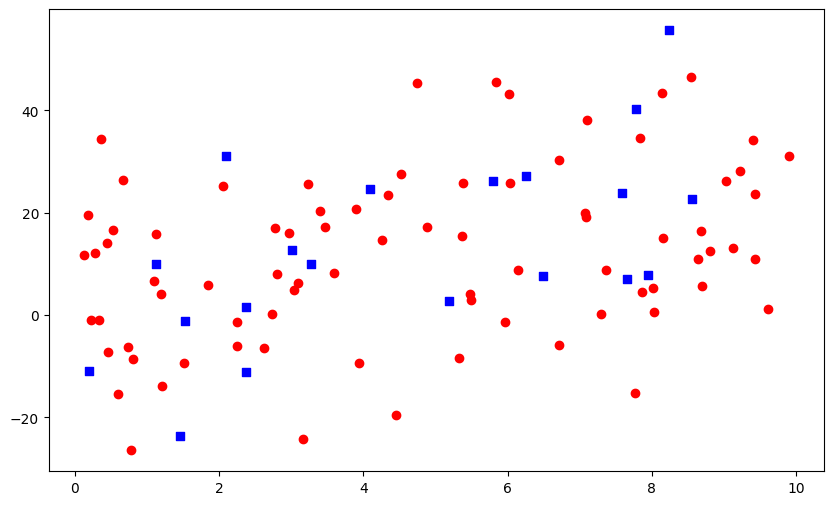

In [ ]:
r=np.random.randint(104)
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=r)
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

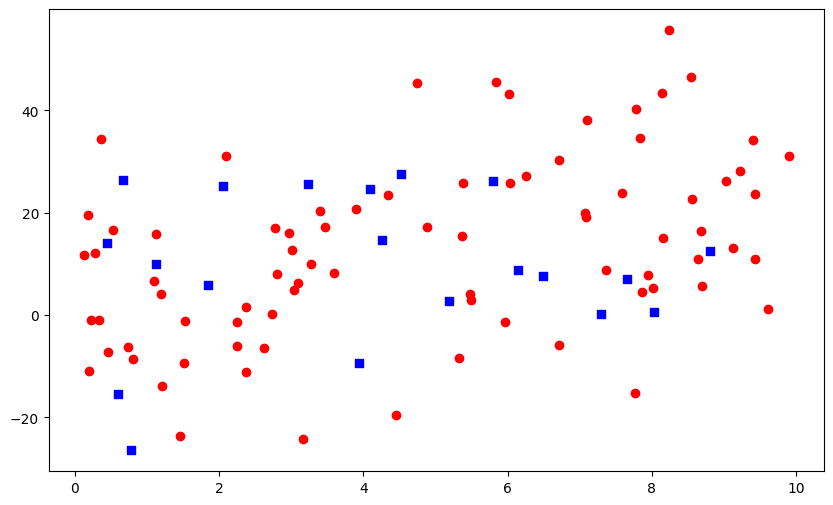

In [ ]:
r=np.random.randint(104)
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=r)
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

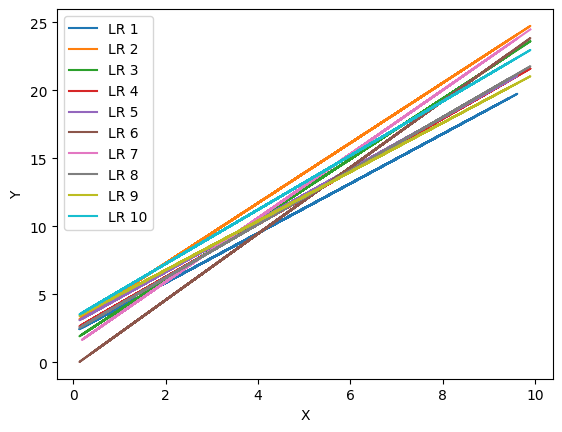

In [ ]:
for i in range(10): # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

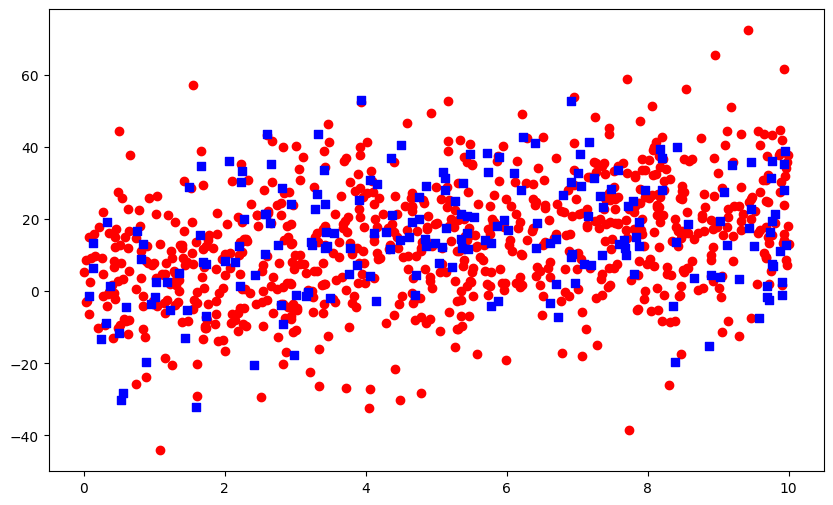

In [ ]:
#increase the sample size to 1000
n_samples = 1000
X = 10 * np.random.rand(n_samples, 1)
epsilon = np.random.normal(0, 15, n_samples)
Y = 3 + 2 * X + epsilon[:, np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o', color='red', label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s', color='blue', label='Testing Data')
plt.show()

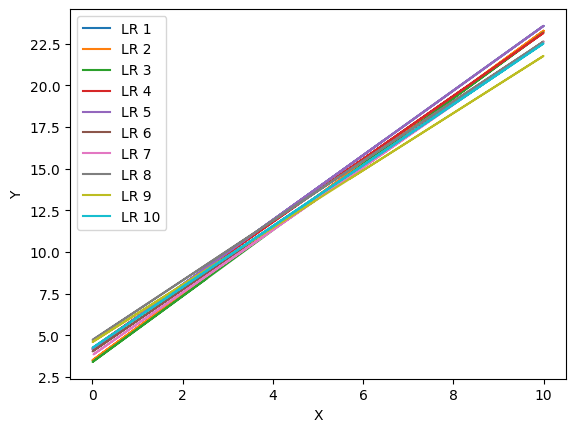

In [ ]:
for i in range(10): # Plotting 10 different instances
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random.randint(104))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [ ]:
 import pandas as pd
 # Concatenate X and y
 df = pd.concat([X, y], axis=1)
 # Drop rows with missing values
 df = df.dropna()
 # Separate X and y again
 X = df.drop(columns=y.columns)
 y = df[y.columns]

In [ ]:
y_sel = df['aveOralM']
# Selecting the independent features
X_sel = df[['Age', 'Humidity','T_Max1', 'T_OR1', 'T_atm']]

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split (X_sel, y_sel , test_size =0.2 , random_state = np . random . randint (104) )

In [ ]:
print(X_train.head)

<bound method NDFrame.head of        Age  Humidity   T_Max1    T_OR1  T_atm
729  21-25      19.6  35.4000  35.2400   24.0
647  18-20      15.1  35.5650  35.4425   23.4
43   21-25      16.0  35.4925  35.4425   23.0
899  21-25      15.3  35.9125  35.7625   23.9
885  26-30      13.5  35.1750  34.7725   23.5
..     ...       ...      ...      ...    ...
912  21-25      15.3  35.9775  35.8675   23.9
25   18-20      22.5  35.6300  35.5725   22.9
791  21-25      55.2  36.5600  36.2350   26.3
544  51-60      20.1  36.1850  35.7500   24.0
803  21-25      30.0  36.8575  36.6500   22.0

[814 rows x 5 columns]>


In [ ]:
df_encoded = pd.get_dummies(X, columns=['Age'], drop_first=True)
X_sel = df_encoded[['Humidity','T_Max1', 'T_OR1', 'T_atm',] + [col for col in df_encoded.columns if col.startswith('Age_')]]
X_train , X_test , Y_train , Y_test = train_test_split (X_sel, y_sel , test_size =0.2 , random_state = np . random . randint(104) )
model = LinearRegression ()
model . fit ( X_train , Y_train )
coefficients = model.coef_

In [ ]:
#Display model coefficients in a table
coefficients_df = pd.DataFrame({'Feature': X_sel.columns, 'Coefficient': coefficients})
print(coefficients_df)

      Feature  Coefficient
0    Humidity     0.000427
1      T_Max1     0.913877
2       T_OR1     0.007975
3       T_atm    -0.046111
4   Age_21-25     0.007783
5   Age_21-30     0.067113
6   Age_26-30    -0.004495
7   Age_31-40    -0.067533
8   Age_41-50     0.096817
9   Age_51-60     0.000651
10    Age_>60    -0.106556


In [ ]:
#display the model intercept
intercept = model.intercept_
print("Model Intercept:", intercept)

Model Intercept: 4.85931427827466


In [ ]:
#Select ’T_OR1’, ’T_OR_Max1’, ’T_FHC_Max1’, ’T_FH_Max1’ features
X_sel = df[['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]
y_sel = df['aveOralM']

X_sel.head()

,T_OR1,T_OR_Max1,T_FHC_Max1,T_FH_Max1
0,35.6350,35.6525,34.0075,34.5300
1,35.0925,35.1075,34.6600,34.6825
2,35.8600,35.8850,35.2225,35.3450
3,34.9650,34.9825,35.3150,35.6025
4,35.5875,35.6175,35.3725,35.4175


In [ ]:
#split into training and testing data
X_train , X_test , Y_train , Y_test = train_test_split (X_sel, y_sel , test_size =0.2 , random_state = np . random . randint(104) )

model = LinearRegression ()
model . fit ( X_train , Y_train )
coefficients = model.coef_

In [ ]:
#print model coefficients
coefficients_df = pd.DataFrame({'Feature': X_sel.columns, 'Coefficient': coefficients})
print(coefficients_df)

      Feature  Coefficient
0       T_OR1     0.153326
1   T_OR_Max1     0.417234
2  T_FHC_Max1    -0.090779
3   T_FH_Max1     0.369443


In [ ]:
#print model intercept
intercept = model.intercept_
print("Model Intercept:", intercept)

Model Intercept: 6.688554291289968


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Add a constant (intercept) to the model
X_train_with_const = sm.add_constant(X_train)

# Fit the model using statsmodels
model_sm = sm.OLS(Y_train, X_train_with_const).fit()

# Predictions on the training set
y_train_pred = model_sm.predict(X_train_with_const)

# Residuals (actual - predicted)
residuals = Y_train - y_train_pred

# Calculate Residual Sum of Squares (RSS)
RSS = np.sum(residuals ** 2)

# Calculate Residual Standard Error (RSE)
N = len(Y_train)  # Number of samples
d = X_train.shape[1]  # Number of independent features
RSE = np.sqrt(RSS / (N - d - 1))

# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(Y_train, y_train_pred)

# Calculate R-squared (R2) statistic
R2 = r2_score(Y_train, y_train_pred)

# Get standard errors, t-statistics, and p-values for each feature
standard_errors = model_sm.bse
t_statistics = model_sm.tvalues
p_values = model_sm.pvalues

# Print all the results
print(f"Residual Sum of Squares (RSS): {RSS}")
print(f"Residual Standard Error (RSE): {RSE}")
print(f"Mean Squared Error (MSE): {MSE}")
print(f"R-squared (R2) statistic: {R2}")

print("\nStandard Errors for each feature:")
for feature, se in zip(X_sel.columns, standard_errors[1:]):  # Skipping the intercept
    print(f"{feature}: {se}")

print("\nT-statistics for each feature:")
for feature, t in zip(X_sel.columns, t_statistics[1:]):  # Skipping the intercept
    print(f"{feature}: {t}")

print("\nP-values for each feature:")
for feature, p in zip(X_sel.columns, p_values[1:]):  # Skipping the intercept
    print(f"{feature}: {p}")


Residual Sum of Squares (RSS): 77.17661510648327
Residual Standard Error (RSE): 0.3088649324302553
Mean Squared Error (MSE): 0.09481156646988116
R-squared (R2) statistic: 0.6528397310358398

Standard Errors for each feature:
T_OR1: 0.8694665336716999
T_OR_Max1: 0.8672245002334331
T_FHC_Max1: 0.04429270282049222
T_FH_Max1: 0.048964051526189434

T-statistics for each feature:
T_OR1: 0.1763447758368738
T_OR_Max1: 0.48111454588726127
T_FHC_Max1: -2.049524154302016
T_FH_Max1: 7.545180752626417

P-values for each feature:
T_OR1: 0.860067221055746
T_OR_Max1: 0.630565185099945
T_FHC_Max1: 0.04073285925720997
T_FH_Max1: 1.216299743510608e-13
